In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from SpikyNet import Model

In [171]:
dt = 0.1    # Timestep (ms).

net = Model(dt=dt, verbose=0)


w_PyrPyr = 20.
w_PyrSom = 10.
w_SomPyr = 185.


net.add_Population(name='Pyr', N=100, type='LIF', tau_m=0, C=107, R=177, tau_ref=4.6, Vth=-47.2, Vrest=-75.5, Vreset=-75.5)

net.add_Population(name='SOM', N=10, type='LIF', tau_m=0, C=71, R=226, tau_ref=2.1, Vth=-46, Vrest=-71.5, Vreset=-71.5)

net.add_Connection(pre='Pyr', post='Pyr', 
                   connect_ratio=10, reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=100, tau_psc=40, mean=w_PyrPyr, std=int(w_PyrPyr*.2))

net.add_Connection(pre='Pyr', post='SOM', 
                   connect_ratio=100, reverse=False, sign=1, learning=0, 
                   ordered=False, g_syn=100, tau_psc=40, mean=w_PyrSom, std=int(w_PyrSom*.2))

net.add_Connection(pre='SOM', post='Pyr', 
                   connect_ratio=100, reverse=True, sign=-1, learning=0, 
                   ordered=False, g_syn=100, tau_psc=40, mean=w_SomPyr, std=int(w_SomPyr*.2))


net.summary()

 Populations Information 


,Pyr,SOM
Number of Neurons,100.000000,10.000000
Membrane Taus (s),0.018939,0.016046
Refractory Period (s),0.004600,0.002100
Spike Threshold (V),-0.047200,-0.046000




 Connectivity Matrix 


,Pyr,SOM
Pyr,10,100
SOM,-100,0




 Synaptic Taus (s) 


,Pyr,SOM
Pyr,0.04,0.04
SOM,0.04,0.00


In [208]:
T_trial = 1000   # ms

net.reset(weights=True)

V = []
for t in np.arange(0, T_trial+dt, dt):
    V.append(np.mean(net.readout_Population(population='Pyr')))
    net.add_externalCurrent(population='Pyr', mean=500e-12, std=300e-12, N=75)
    net.advance()

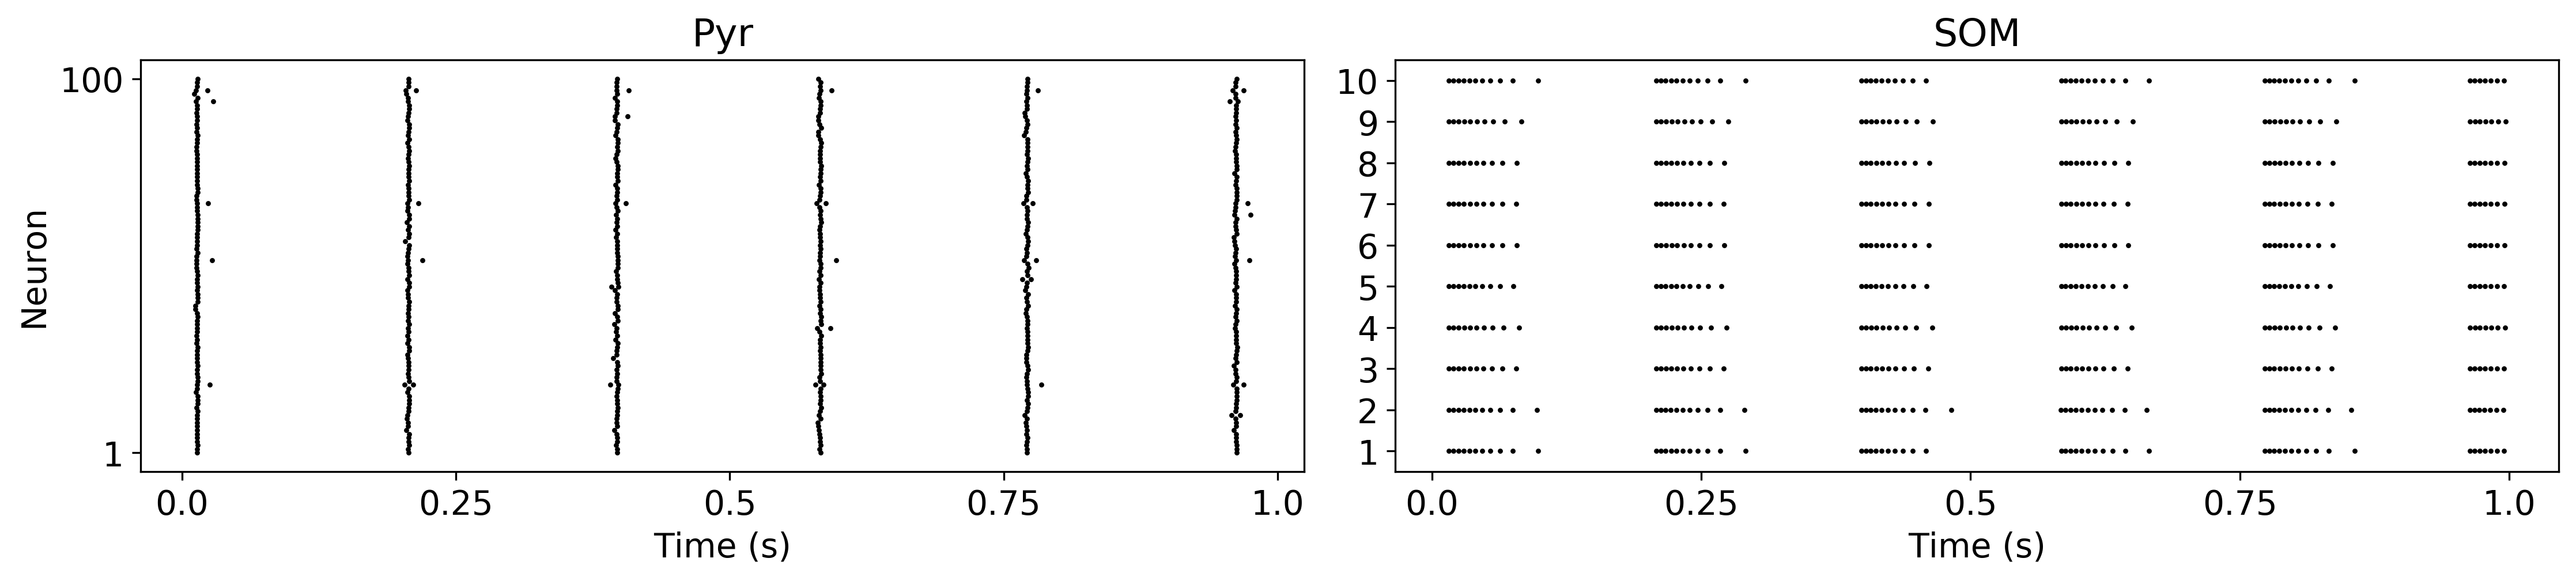

In [209]:
r = net.plot_rasters(time_limits=[], marker_size=5.)

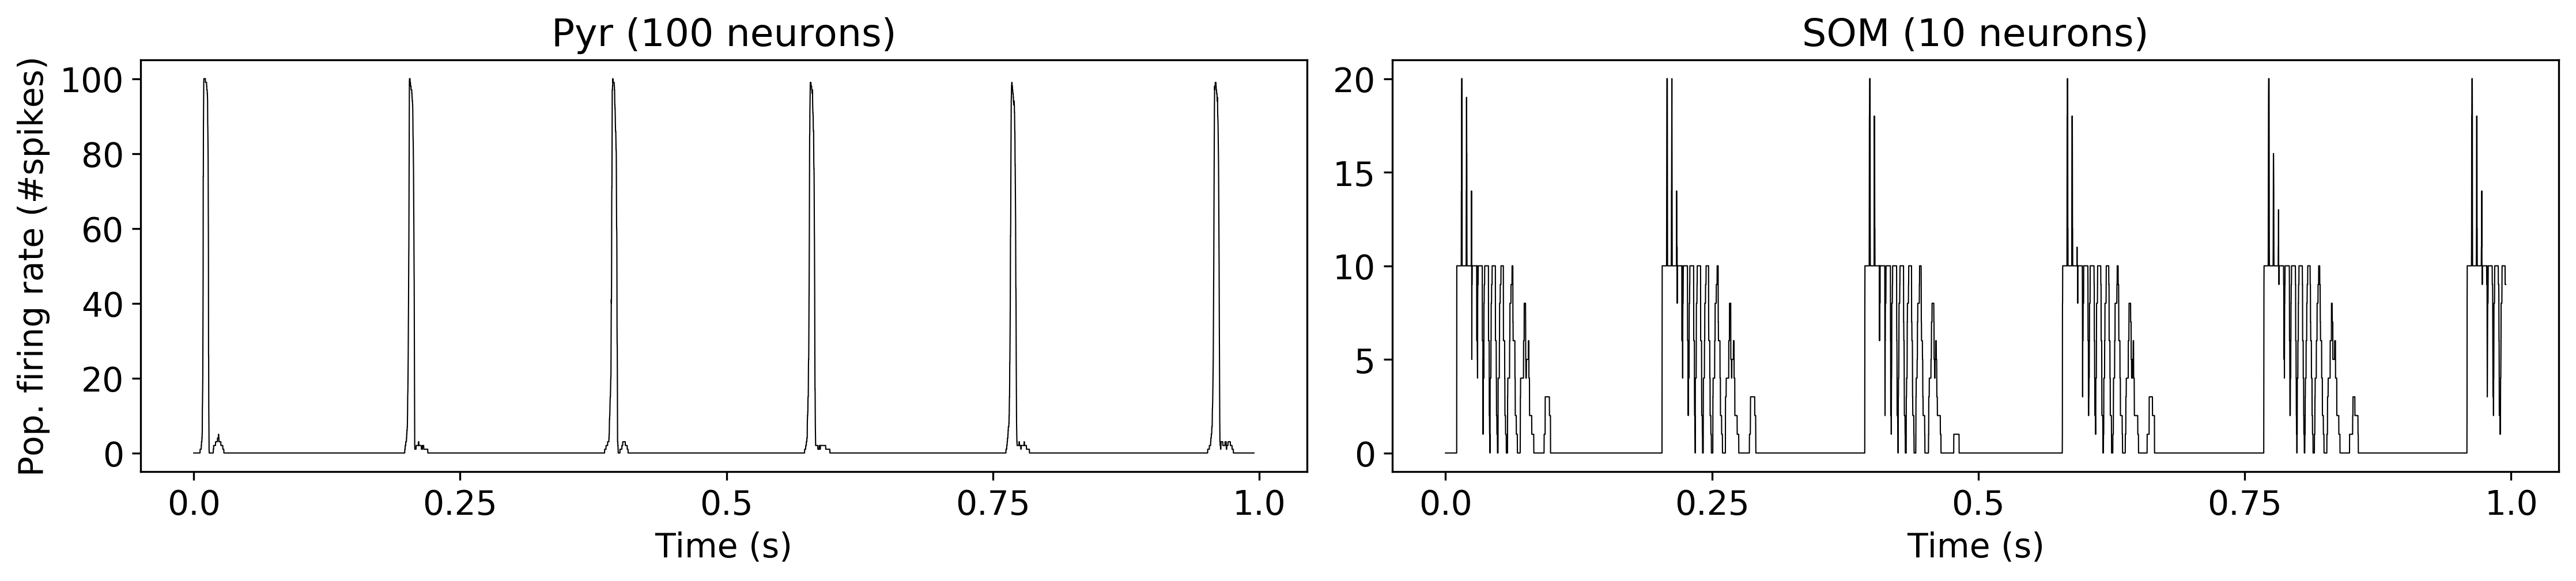

In [210]:
net.plot_firingRates(type='average', time_window=5e-3)

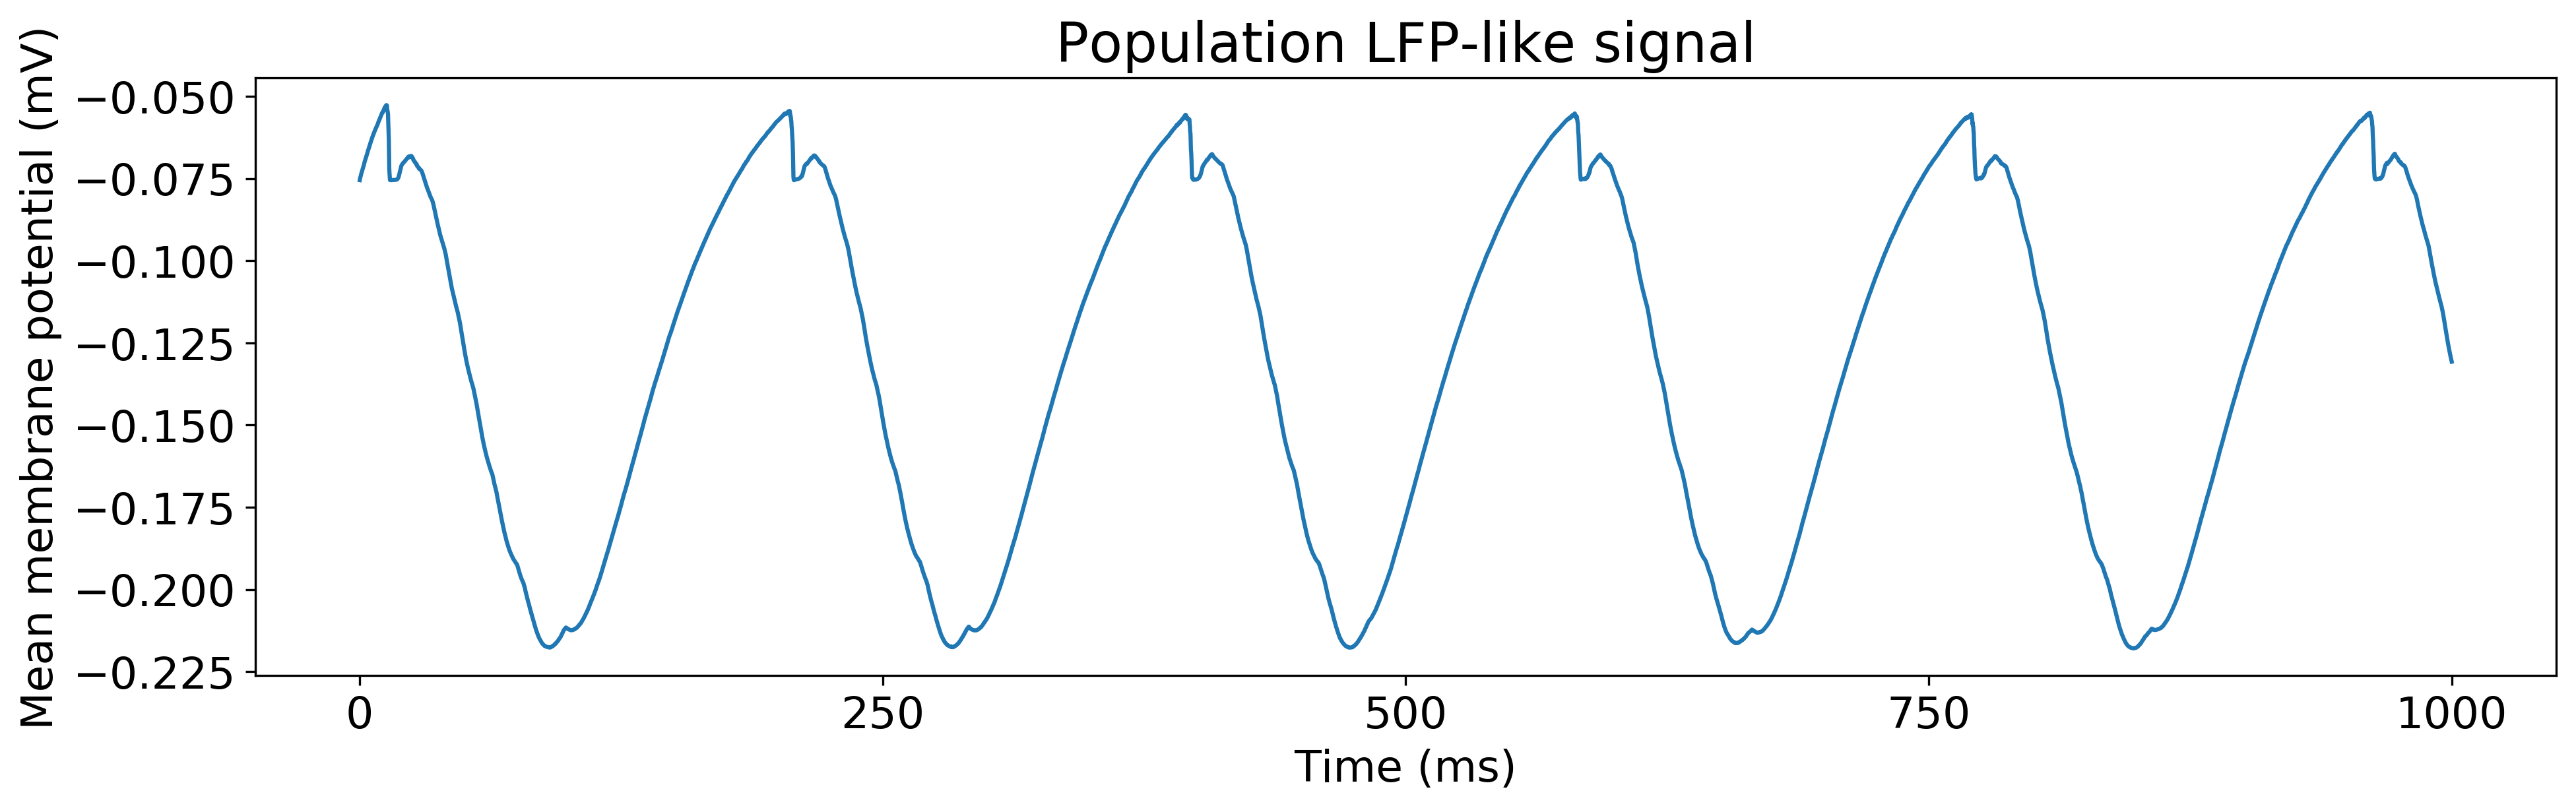

In [211]:
# LFP as the mean of population' membrane potential
plt.figure(figsize=(15,4), dpi=300)
plt.plot(V)
plt.title('Population LFP-like signal', fontsize=20)
plt.xticks(np.linspace(0, int(T_trial/dt), 5), np.linspace(0, T_trial, 5, dtype=int), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Mean membrane potential (mV)', fontsize=16)
plt.show()

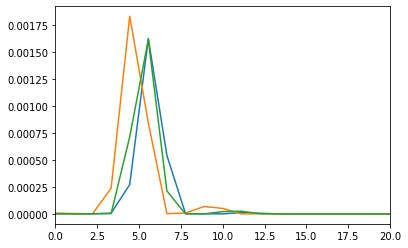

In [212]:
import scipy.signal as sc

psd3 = sc.welch(V[1000:], fs=10000, nperseg=10000)

plt.plot(psd[0], psd[1])
plt.plot(psd2[0], psd2[1])
plt.plot(psd3[0], psd3[1])

plt.xlim(0,20)
plt.show()